# Similarities and Differences of Top vs. Bottom 20% (Pt.1 - Age, Gender, Won/Lost Amount)

In [7]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf

month_file = '2_June'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


## General Overview

### Players, Visits, Sessions of Each Group

In [8]:

# Read in data
df_bottom_20 = pd.read_parquet("Bottom_20_gambles.parquet")
df_top_20 = pd.read_parquet("Top_20_gambles.parquet")
print('--------------------------------------------------')

# Eliminate players who maximum number of gambles is 1
df_bottom_20 = df_bottom_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)
df_top_20 = df_top_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)

# Reset index
df_bottom_20.index = np.arange(1, len(df_bottom_20) + 1)
df_top_20.index = np.arange(1, len(df_top_20) + 1)

# Round wageredamt and profit to 2 decimal places
df_bottom_20['wageredamt'] = df_bottom_20['wageredamt'].round(1)
df_bottom_20['profit'] = df_bottom_20['profit'].round(1)
df_bottom_20['percent_return'] = df_bottom_20['percent_return'].round(1)
df_top_20['wageredamt'] = df_top_20['wageredamt'].round(1)
df_top_20['profit'] = df_top_20['profit'].round(1)
df_top_20['percent_return'] = df_top_20['percent_return'].round(1)


--------------------------------------------------


In [9]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_bottom_20['result_type'] = df_bottom_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_bottom_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_bottom_20 = pd.concat([df_bottom_20, dummy_variables], axis=1).reset_index(drop=True)

In [11]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_top_20['result_type'] = df_top_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_top_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_top_20 = pd.concat([df_top_20, dummy_variables], axis=1).reset_index(drop=True)

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({'playerkey': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
                   'percent_return': [0.1, 0.5, 0.3, -0.2, 0.6, 0.2, 0.4, 0.8, -0.1]})

# create a shifted version of percent_return column
shifted = df['percent_return'].shift(1)

# create a condition that checks if both the current and previous value of percent_return are positive
condition = (df['percent_return'] > 0) & (shifted > 0)

# create the '2Ws' column based on the condition
df['2Ws'] = condition.astype(int)

# display the final dataframe
print(df)


In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({'playerkey': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
                   'percent_return': [0.1, 0.5, 0.3, -0.2, 0.6, 0.2, 0.4, 0.8, -0.1]})

# create a shifted version of percent_return column
shifted = df.groupby('playerkey')['percent_return'].shift(1)

# create a condition that checks if both the current and previous value of percent_return are positive
condition = (df['percent_return'] > 0) & (shifted > 0)

# create the '2Ws' column based on the condition
df['2Ws'] = condition.astype(int)

# display the final dataframe
print(df)


In [ ]:
import pandas as pd

# create a sample dataframe
df = df_bottom_20

grouping = 'visit'
# create a shifted version of percent_return column within each player's visit
shifted = df.groupby(['playerkey', grouping])['percent_return'].shift(1)

# create a condition that checks if the current and previous value of percent_return are positive
condition1 = (df['percent_return'] > 0) & (shifted > 0)

# create a condition that checks if the current, previous, and two rows up values of percent_return are positive
condition2 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0)

# create a condition that checks if the current, previous, two rows up, and three rows up values of percent_return are positive
condition3 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0) & (shifted.shift(2) > 0)

# Column names
col1_name = f"2ws_{grouping[0]}"
col2_name = f"3ws_{grouping[0]}"
col3_name = f"4ws_{grouping[0]}"

# apply the conditions to create the '2Ws', '3Ws', and '4Ws' columns
for i, row in df.iterrows():
    if condition3[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i-2, col1_name] = 0
        df.loc[i-1, col2_name] = 0
        df.loc[i-2, col2_name] = 0
        df.loc[i, col3_name] = 1
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i-2, col3_name] = 0
    elif condition2[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i, col2_name] = 1
        df.loc[i-1, col2_name] = 0
        df.loc[i, col3_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i, col1_name] = 0
    elif condition1[i]:
        df.loc[i, col1_name] = 1
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0
    else:
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0

# display the updated dataframe

print(df)

In [ ]:
df = pf.consecutive_wins(df_bottom_20, groupby='visit')

print(df)

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({'playerkey': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E'],
                   'percent_return': [0.1, 0.5, 0.3, 0.2, 0.6, 0.2, 0.4, 0.8, 0.1, 0.1, 0.5, 0.3, 0.2, -0.1, -0.5, 0.3, 0.2],
                   'wagered_amt': [1, 5, 3, 2, 6, 2, 4, 8, 1, 1, 5, 3, 2, 1, 5, 3, 2],
                   'amount_won': [10, 50, 30, 20, -10, 60, 20, 40, 80, 10, 50, 30, 20, 10, 50, 30, 20],
                   'visit': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,2,2, 1,1,2,2]})

grouping = 'visit'
# create a shifted version of percent_return column within each player's visit
shifted = df.groupby(['playerkey', grouping])['percent_return'].shift(1)

# create a condition that checks if the current and previous value of percent_return are positive
condition1 = (df['percent_return'] > 0) & (shifted > 0)

# create a condition that checks if the current, previous, and two rows up values of percent_return are positive
condition2 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0)

# create a condition that checks if the current, previous, two rows up, and three rows up values of percent_return are positive
condition3 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0) & (shifted.shift(2) > 0)

# Column names
col1_name = f"2ws_{grouping[0]}"
col2_name = f"3ws_{grouping[0]}"
col3_name = f"4ws_{grouping[0]}"

# apply the conditions to create the '2Ws', '3Ws', and '4Ws' columns
for i, row in df.iterrows():
    if condition3[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i-2, col1_name] = 0
        df.loc[i-1, col2_name] = 0
        df.loc[i-2, col2_name] = 0
        df.loc[i, col3_name] = 1
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i-2, col3_name] = 0
    elif condition2[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i, col2_name] = 1
        df.loc[i-1, col2_name] = 0
        df.loc[i, col3_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i, col1_name] = 0
    elif condition1[i]:
        df.loc[i, col1_name] = 1
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0
    else:
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0

# Create new column called '2ws_amt' that contains the total amount won in the last 2 wins when 2ws_v is 1
condition4 = df[col1_name] == 1
condition5 = df[col2_name] == 1
condition6 = df[col3_name] == 1

amount_won_2ws = []
wagered_amt_2ws = []
for i, row in df.iterrows():
    if condition4[i]:
        amount_won_2ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'])
        wagered_amt_2ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'])
    else:
        amount_won_2ws.append(0)
        wagered_amt_2ws.append(0)

amount_won_3ws = []
wagered_amt_3ws = []
for i, row in df.iterrows():
    if condition5[i]:
        amount_won_3ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'] + df.loc[i-2, 'amount_won'])
        wagered_amt_3ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'] + df.loc[i-2, 'wagered_amt'])
    else:
        amount_won_3ws.append(0)
        wagered_amt_3ws.append(0)

amount_won_4ws = []
wagered_amt_4ws = []
for i, row in df.iterrows():
    if condition6[i]:
        amount_won_4ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'] + df.loc[i-2, 'amount_won'] + df.loc[i-3, 'amount_won'])
        wagered_amt_4ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'] + df.loc[i-2, 'wagered_amt'] + df.loc[i-3, 'wagered_amt'])
    else:
        amount_won_4ws.append(0)
        wagered_amt_4ws.append(0)

# Column names
col4_name = f"2ws_wonamt_{grouping[0]}"
col5_name = f"3ws_wonamt_{grouping[0]}"
col6_name = f"4ws_wonamt_{grouping[0]}"

col7_name = f"2ws_wgramt_{grouping[0]}"
col8_name = f"3ws_wgramt_{grouping[0]}"
col9_name = f"4ws_wgramt_{grouping[0]}"

# Add columns to dataframe
df[col4_name] = amount_won_2ws
df[col5_name] = amount_won_3ws 
df[col6_name] = amount_won_4ws

df[col7_name] = wagered_amt_2ws
df[col8_name] = wagered_amt_3ws
df[col9_name] = wagered_amt_4ws

print(df)


In [ ]:
# Create new column called '2ws_amt' that contains the total amount won in the last 2 wins when 2ws_v is 1
condition4 = df[col1_name] == 1
condition5 = df[col2_name] == 1
condition6 = df[col3_name] == 1

amount_won_2ws = []
wagered_amt_2ws = []
for i, row in df.iterrows():
    if condition4[i]:
        amount_won_2ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'])
        wagered_amt_2ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'])
    else:
        amount_won_2ws.append(0)
        wagered_amt_2ws.append(0)

amount_won_3ws = []
wagered_amt_3ws = []
for i, row in df.iterrows():
    if condition5[i]:
        amount_won_3ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'] + df.loc[i-2, 'amount_won'])
        wagered_amt_3ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'] + df.loc[i-2, 'wagered_amt'])
    else:
        amount_won_3ws.append(0)
        wagered_amt_3ws.append(0)

amount_won_4ws = []
wagered_amt_4ws = []
for i, row in df.iterrows():
    if condition6[i]:
        amount_won_4ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'] + df.loc[i-2, 'amount_won'] + df.loc[i-3, 'amount_won'])
        wagered_amt_4ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'] + df.loc[i-2, 'wagered_amt'] + df.loc[i-3, 'wagered_amt'])
    else:
        amount_won_4ws.append(0)
        wagered_amt_4ws.append(0)

# Column names
col4_name = f"2ws_wonamt_{grouping[0]}"
col5_name = f"3ws_wonamt_{grouping[0]}"
col6_name = f"4ws_wonamt_{grouping[0]}"

col7_name = f"2ws_wgramt_{grouping[0]}"
col8_name = f"3ws_wgramt_{grouping[0]}"
col9_name = f"4ws_wgramt_{grouping[0]}"

# Add columns to dataframe
df[col4_name] = amount_won_2ws
df[col5_name] = amount_won_3ws 
df[col6_name] = amount_won_4ws

df[col7_name] = wagered_amt_2ws
df[col8_name] = wagered_amt_3ws
df[col9_name] = wagered_amt_4ws

 
print(df)

In [ ]:
# Test on actual dataframe

df = df_bottom_20

grouping = 'visit'
# create a shifted version of percent_return column within each player's visit
shifted = df.groupby(['playerkey', grouping])['percent_return'].shift(1)

# create a condition that checks if the current and previous value of percent_return are positive
condition1 = (df['percent_return'] > 0) & (shifted > 0)

# create a condition that checks if the current, previous, and two rows up values of percent_return are positive
condition2 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0)

# create a condition that checks if the current, previous, two rows up, and three rows up values of percent_return are positive
condition3 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0) & (shifted.shift(2) > 0)

# Column names
col1_name = f"2ws_{grouping[0]}"
col2_name = f"3ws_{grouping[0]}"
col3_name = f"4ws_{grouping[0]}"

# apply the conditions to create the '2Ws', '3Ws', and '4Ws' columns
for i, row in df.iterrows():
    if condition3[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i-2, col1_name] = 0
        df.loc[i-1, col2_name] = 0
        df.loc[i-2, col2_name] = 0
        df.loc[i, col3_name] = 1
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i-2, col3_name] = 0
    elif condition2[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i, col2_name] = 1
        df.loc[i-1, col2_name] = 0
        df.loc[i, col3_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i, col1_name] = 0
    elif condition1[i]:
        df.loc[i, col1_name] = 1
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0
    else:
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0

# Create new column called '2ws_amt' that contains the total amount won in the last 2 wins when 2ws_v is 1
condition4 = df[col1_name] == 1
condition5 = df[col2_name] == 1
condition6 = df[col3_name] == 1

amount_won_2ws = []
wagered_amt_2ws = []
for i, row in df.iterrows():
    if condition4[i]:
        amount_won_2ws.append(df.loc[i, 'profit'] + df.loc[i-1, 'profit'])
        wagered_amt_2ws.append(df.loc[i, 'wageredamt'] + df.loc[i-1, 'wageredamt'])
    else:
        amount_won_2ws.append(0)
        wagered_amt_2ws.append(0)

amount_won_3ws = []
wagered_amt_3ws = []
for i, row in df.iterrows():
    if condition5[i]:
        amount_won_3ws.append(df.loc[i, 'profit'] + df.loc[i-1, 'profit'] + df.loc[i-2, 'profit'])
        wagered_amt_3ws.append(df.loc[i, 'wageredamt'] + df.loc[i-1, 'wageredamt'] + df.loc[i-2, 'wageredamt'])
    else:
        amount_won_3ws.append(0)
        wagered_amt_3ws.append(0)

amount_won_4ws = []
wagered_amt_4ws = []
for i, row in df.iterrows():
    if condition6[i]:
        amount_won_4ws.append(df.loc[i, 'profit'] + df.loc[i-1, 'profit'] + df.loc[i-2, 'profit'] + df.loc[i-3, 'profit'])
        wagered_amt_4ws.append(df.loc[i, 'wageredamt'] + df.loc[i-1, 'wageredamt'] + df.loc[i-2, 'wageredamt'] + df.loc[i-3, 'wageredamt'])
    else:
        amount_won_4ws.append(0)
        wagered_amt_4ws.append(0)

# Column names
col4_name = f"2ws_profit_{grouping[0]}"
col5_name = f"3ws_profit_{grouping[0]}"
col6_name = f"4ws_profit_{grouping[0]}"

col7_name = f"2ws_wgramt_{grouping[0]}"
col8_name = f"3ws_wgramt_{grouping[0]}"
col9_name = f"4ws_wgramt_{grouping[0]}"

# Add columns to dataframe
df[col4_name] = amount_won_2ws
df[col5_name] = amount_won_3ws 
df[col6_name] = amount_won_4ws

df[col7_name] = wagered_amt_2ws
df[col8_name] = wagered_amt_3ws
df[col9_name] = wagered_amt_4ws

# Create a column called 'profit/bet' that contains the ratio of profit to wagered amount
df['profit/bet'] = df['profit'] / df['wageredamt']
df63 = df

In [21]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_bottom_20 = pf.consecutive_wins(df_bottom_20, 'visit')
df_top_20 = pf.consecutive_wins(df_top_20, 'visit')

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({'playerkey': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
                   'percent_return': [0.1, 0.5, 0.3, 0.2, -0.1, 0.6, -0.2, 0.4, 0.8, -0.1],
                   'amount_won': [10, 50, 30, 20, -10, 60, -20, 40, 80, -10],
                   'visit': [1, 2, 3, 1, 2, 3, 1, 1, 1, 2]})

# create a shifted version of percent_return column within each player's visit
shifted = df.groupby(['playerkey', 'visit'])['percent_return'].shift(1)

# create a condition that checks if the current, previous, and two rows up values of percent_return are positive
condition2 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0)

# create the '3Ws' column based on the condition
df['3Ws'] = condition2.astype(int)

# display the final dataframe
print(df)


In [12]:
# Number of gamblers
print("Number of gamblers in bottom 20%:", len(df_bottom_20['playerkey'].unique()))
print("Number of gamblers in top 20%:", len(df_top_20['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in bottom 20%:", len(df_bottom_20['visit'].unique()))
print("Number of unique visits in top 20%:", len(df_top_20['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in bottom 20%:", len(df_bottom_20['session_time'].unique()))
print("Number of unique sessions in top 20%:", len(df_top_20['session_time'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions on session_machine
print("Number of unique sessions on session_machine in bottom 20%:", len(df_bottom_20['session_machine'].unique()))
print("Number of unique sessions on session_machine in top 20%:", len(df_top_20['session_machine'].unique()))



Number of gamblers in bottom 20%: 56
Number of gamblers in top 20%: 57
--------------------------------------------------
Number of unique visits in bottom 20%: 1
Number of unique visits in top 20%: 1
--------------------------------------------------
Number of unique sessions in bottom 20%: 2
Number of unique sessions in top 20%: 6
--------------------------------------------------
Number of unique sessions on session_machine in bottom 20%: 6
Number of unique sessions on session_machine in top 20%: 436


### Rank Differences

--------------------------------------------------
Number of unique players in bottom 20%:
rank
1.0    37
2.0     2
3.0     4
6.0    13
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
rank
1.0    30
2.0     8
3.0     5
6.0    14
Name: playerkey, dtype: int64
--------------------------------------------------


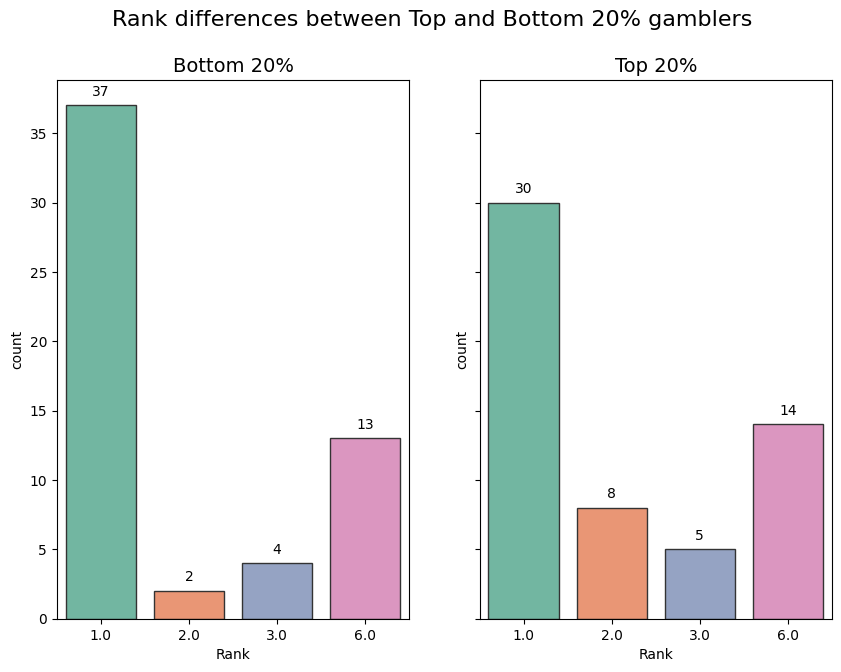

In [13]:
# For every unique rank, print the number of unique players
print('--------------------------------------------------')
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('rank', df_top_20, df_bottom_20, title='Rank', figsize=(10, 7))

### Gender Differences

Number of unique players in bottom 20%:
gender
F    21
M    35
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
gender
F    25
M    32
Name: playerkey, dtype: int64
--------------------------------------------------


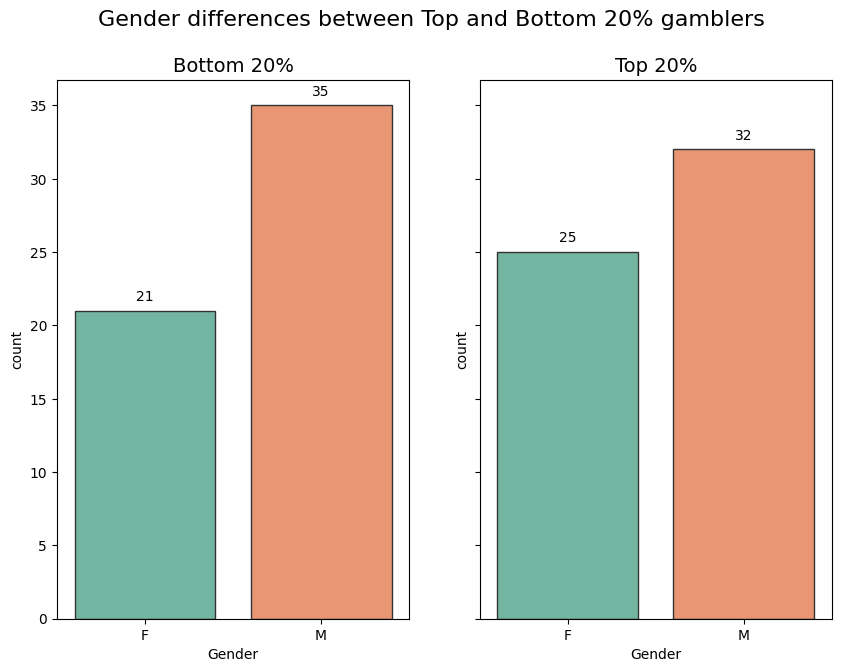

In [14]:
# Gender differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('gender', df_top_20, df_bottom_20, title='Gender', figsize=(10, 7))

### Age Differences

In [15]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for bottom 20% and top 20%
df_bottom_20['age_range'] = pd.cut(df_bottom_20['age'], bins=bins, labels=labels, right=False)
df_bottom_20['age_gen'] = pd.cut(df_bottom_20['age'], bins=bins, labels=generations, right=False)

df_top_20['age_range'] = pd.cut(df_top_20['age'], bins=bins, labels=labels, right=False)
df_top_20['age_gen'] = pd.cut(df_top_20['age'], bins=bins, labels=generations, right=False)

Number of unique players in bottom 20%:
age_range
18-24     0
25-40    20
41-55    19
56-75    14
76+       3
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_range
18-24     0
25-40     9
41-55    21
56-75    25
76+       2
Name: playerkey, dtype: int64
--------------------------------------------------


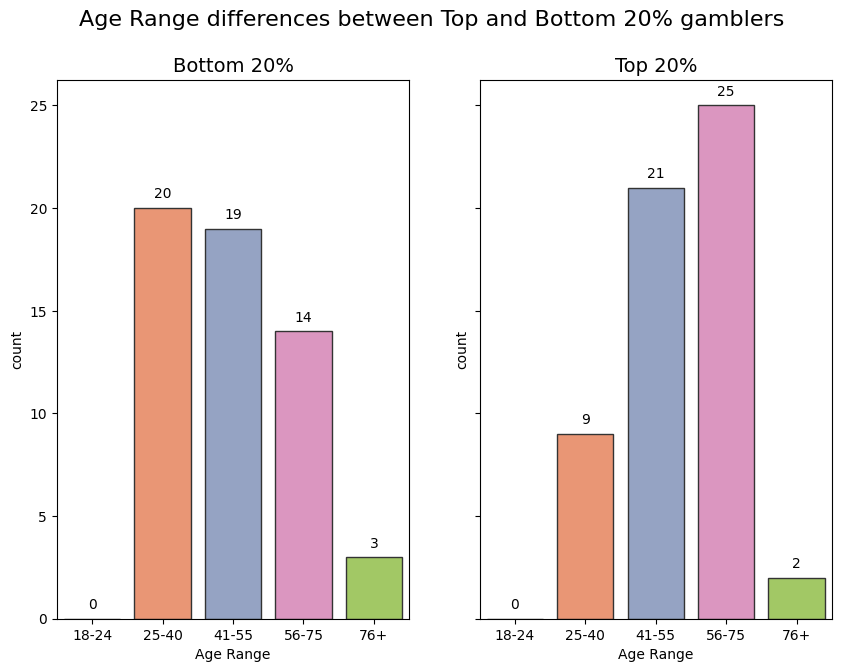

In [16]:
# Age range differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('age_range', df_top_20, df_bottom_20, title='Age Range', figsize=(10, 7))

Number of unique players in bottom 20%:
age_gen
Gen Z            0
Millenials      20
Gen X           19
Baby Boomers    14
Silent           3
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_gen
Gen Z            0
Millenials       9
Gen X           21
Baby Boomers    25
Silent           2
Name: playerkey, dtype: int64
--------------------------------------------------


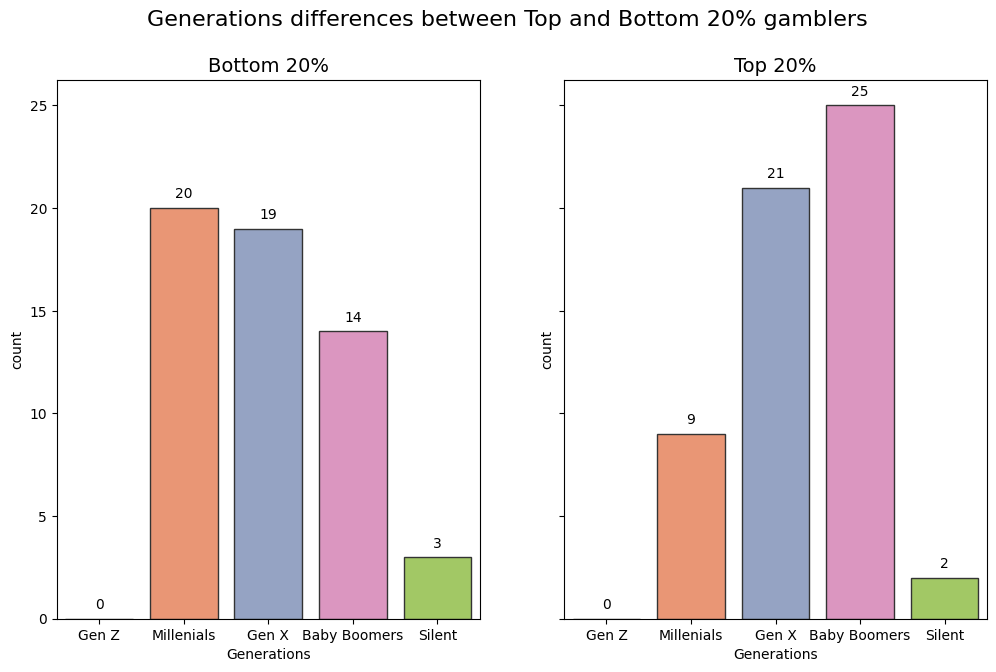

In [17]:
# Age generation differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('age_gen', df_top_20, df_bottom_20, title='Generations', figsize=(12, 7))


Male age differences in bottom 20%:
age_range
18-24     0
25-40    12
41-55    12
56-75     8
76+       3
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in bottom 20%:
age_range
18-24    0
25-40    8
41-55    7
56-75    6
76+      0
Name: playerkey, dtype: int64


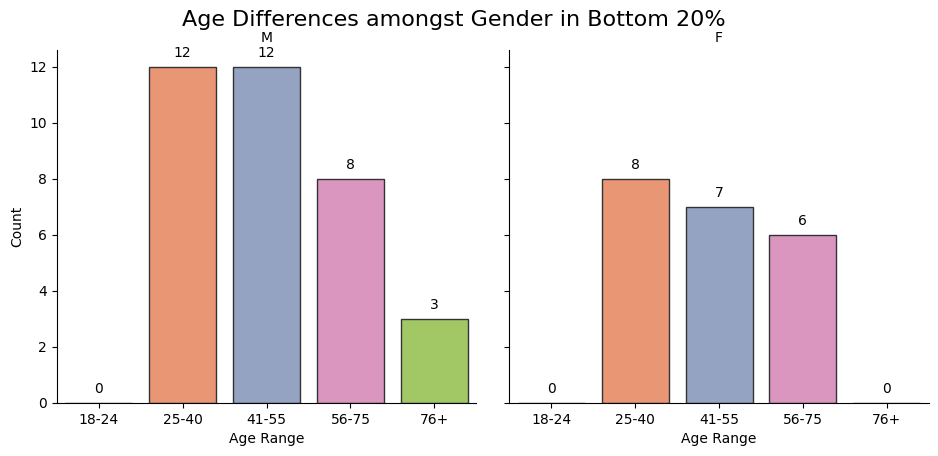

In [18]:
# Age range of male gamblers in bottom 20%
print("Male age differences in bottom 20%:")
print(df_bottom_20[df_bottom_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in bottom 20%
print('Female age differences in bottom 20%:')
print(df_bottom_20[df_bottom_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df_bottom_20, 'Bottom 20%', figsize=(10, 5))


Male age differences in top 20%:
age_range
18-24     0
25-40     8
41-55    11
56-75    12
76+       1
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in top 20%:
age_range
18-24     0
25-40     1
41-55    10
56-75    13
76+       1
Name: playerkey, dtype: int64
--------------------------------------------------


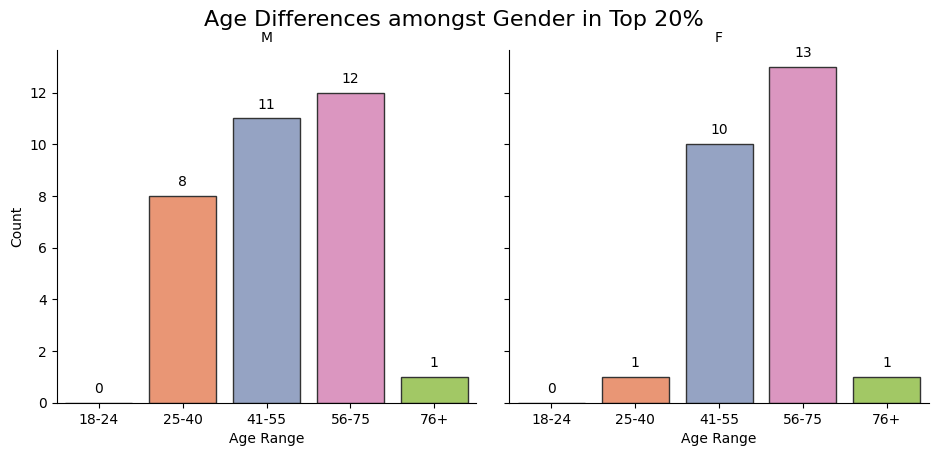

In [19]:
# Age range of male gamblers in top 20%
print("Male age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of female gamblers in top 20%
print("Female age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot gender differences
pf.plot_gender_diff(df_top_20, 'Top 20%', figsize=(10, 5))

### Wealth Differences
#### General

Total amount won or lost by all players in bottom 20%:
-942.56006
Average amount won or lost by each player in bottom 20%:
-16.83
-------------------------------------------------------
Total amount won or lost by all players in top 20%:
244.61035
Average amount won or lost by each player in top 20%:
4.29


Text(0.5, 0, 'Ending Balance')

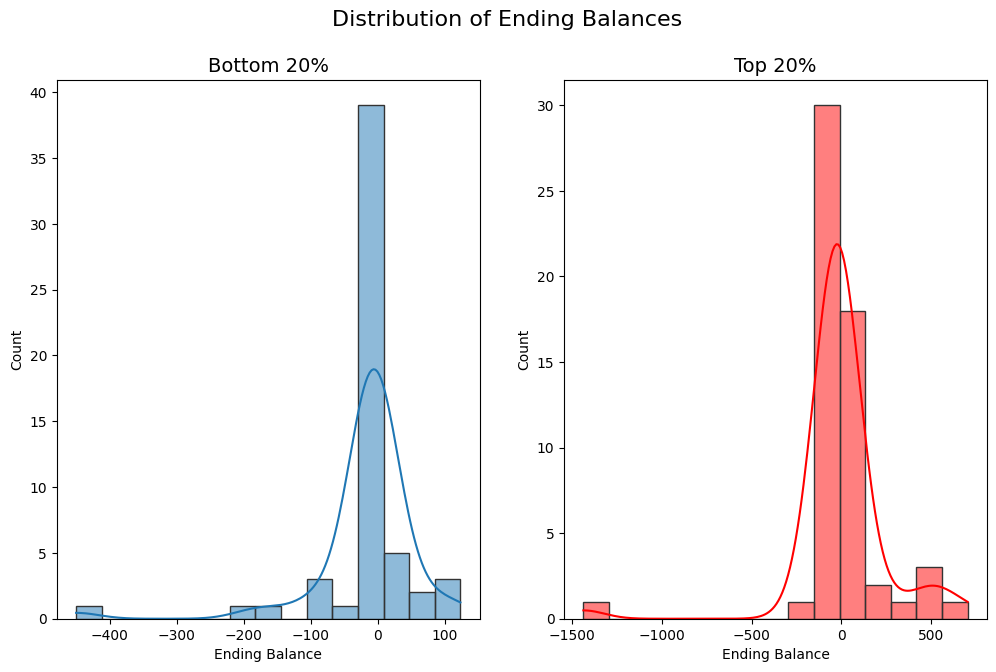

In [20]:
# Total amoun lost or won by all players in bottom 20%
# Group by 'playerkey'
grouped_b = df_bottom_20.groupby('playerkey')

# Calculate the amount won or lost by each player
b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

# Calculate the total amount won or lost by all players
b_amount_won_lost_total = grouped_b['playercashableamt'].last().sum() - grouped_b['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
b_amount_won_lost_avg = b_amount_won_lost_total / len(grouped_b)

# Total amoun lost or won by all players in top 20%
# Group by 'playerkey'
grouped_t = df_top_20.groupby('playerkey')

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

# Calculate the total amount won or lost by all players
t_amount_won_lost_total = grouped_t['playercashableamt'].last().sum() - grouped_t['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
t_amount_won_lost_avg = t_amount_won_lost_total / len(grouped_t)

# Prin Results
print('Total amount won or lost by all players in bottom 20%:')
print(b_amount_won_lost_total)
print('Average amount won or lost by each player in bottom 20%:')
print(round(b_amount_won_lost_avg, 2))
print('-------------------------------------------------------')
print('Total amount won or lost by all players in top 20%:')
print(t_amount_won_lost_total)
print('Average amount won or lost by each player in top 20%:')
print(round(t_amount_won_lost_avg, 2))

# Create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
# Set Title
fig.suptitle('Distribution of Ending Balances', fontsize=16)
# Plot histogram of amount won or lost by all players in bottom 20%
sns.histplot(b_amount_won_lost_each, ax=ax[0], bins=15, kde=True, edgecolor=".2")
ax[0].set_title('Bottom 20%', fontsize=14)
ax[0].set_xlabel('Ending Balance')

# Plot histogram of amount won or lost by all players in top 20%
sns.histplot(t_amount_won_lost_each, ax=ax[1], bins=15, kde=True, edgecolor=".2", color='red')
ax[1].set_title('Top 20%', fontsize=14)
ax[1].set_xlabel('Ending Balance')



#### Per Visit

In [22]:
# Create dataframe
# Group by 'playerkey' bottom 20%
grouped_b = df_bottom_20.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the amount won or lost by each player
b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

# Group by 'playerkey' 
grouped_t = df_top_20.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

# Create df_all_b dataframe
df_all_b = pd.DataFrame({
    'beginning_amt': grouped_b['playercashableamt'].first(),
    'ending_amt': grouped_b['playercashableamt'].last(),
    'ending_balance': b_amount_won_lost_each,
    'ave_slotdenom': grouped_b['slotdenomination'].mean(),
    'ave_theo_payback' : grouped_b['theoreticalpaybackpercent'].mean(),
    'ave_return' : grouped_b['percent_return'].mean(),
    'ave_wageramt': grouped_b['wageredamt'].mean(),
    'ave_p/b': grouped_b['profit/bet'].mean(),
    '#W': grouped_b['#G'].sum(),
    '#L': grouped_b['#L'].sum(),
    '#NH': grouped_b['#N'].sum(),
    '#D': grouped_b['#D'].sum(),
    'w/g': grouped_b['#G'].sum()/grouped_b['gambles_visit'].last(),
    'l/g': grouped_b['#L'].sum()/grouped_b['gambles_visit'].last(),
    'nh/g': grouped_b['#N'].sum()/grouped_b['gambles_visit'].last(),
    'd/g': grouped_b['#D'].sum()/grouped_b['gambles_visit'].last(),
    '#2ws': grouped_b['#2ws'].sum(),
    '2ws_profit': grouped_b['2ws_profit'].sum(),
    '2ws_wgramt': grouped_b['2ws_wgramt'].sum(),
    '#3ws': grouped_b['#3ws'].sum(),
    '3ws_profit': grouped_b['3ws_profit'].sum(),
    '3ws_wgramt': grouped_b['3ws_wgramt'].sum(),
    '#4ws': grouped_b['#4ws'].sum(),
    '4ws_profit': grouped_b['4ws_profit'].sum(),
    '4ws_wgramt': grouped_b['4ws_wgramt'].sum(),
    'ave_time_per_gamble': grouped_b['duration'].mean(),
    'total_duration': grouped_b['duration'].sum(),
    'total_gambles': grouped_b['gambles_visit'].last()
}).dropna()

df_all_b['percentile'] = 'Bottom 20%'

# Create df_all_t dataframe
df_all_t = pd.DataFrame({
    'beginning_amt': grouped_t['playercashableamt'].first(),
    'ending_amt': grouped_t['playercashableamt'].last(),
    'ending_balance': t_amount_won_lost_each,
    'ave_slotdenom': grouped_t['slotdenomination'].mean(),
    'ave_theo_payback' : grouped_t['theoreticalpaybackpercent'].mean(),
    'ave_return' : grouped_t['percent_return'].mean(),
    'ave_wageramt': grouped_t['wageredamt'].mean(),
    'ave_p/b': grouped_t['profit/bet'].mean(),
    '#W': grouped_t['#G'].sum(),
    '#L': grouped_t['#L'].sum(),
    '#NH': grouped_t['#N'].sum(),
    '#D': grouped_t['#D'].sum(),
    'w/g': grouped_t['#G'].sum()/grouped_t['gambles_visit'].last(),
    'l/g': grouped_t['#L'].sum()/grouped_t['gambles_visit'].last(),
    'nh/g': grouped_t['#N'].sum()/grouped_t['gambles_visit'].last(),
    'd/g': grouped_t['#D'].sum()/grouped_t['gambles_visit'].last(),
    '#2ws': grouped_t['#2ws'].sum(),
    '2ws_profit': grouped_t['2ws_profit'].sum(),
    '2ws_wgramt': grouped_t['2ws_wgramt'].sum(),
    '#3ws': grouped_t['#3ws'].sum(),
    '3ws_profit': grouped_t['3ws_profit'].sum(),
    '3ws_wgramt': grouped_t['3ws_wgramt'].sum(),
    '#4ws': grouped_t['#4ws'].sum(),
    '4ws_profit': grouped_t['4ws_profit'].sum(),
    '4ws_wgramt': grouped_t['4ws_wgramt'].sum(),
    'ave_time_per_gamble': grouped_t['duration'].mean(),
    'total_duration': grouped_t['duration'].sum(),
    'total_gambles': grouped_t['gambles_visit'].last(),
}).dropna()

df_all_t['percentile'] = 'Top 20%'

# Concatenate dataframes
df_all = pd.concat([df_all_b, df_all_t]).reset_index()


In [ ]:
df_all_v = pf.merge_dfs_per_player(df_top_20, df_bottom_20, 'visit', print_results=False)

##### Distribution Ending Balances

In [ ]:
# Save dataframe to paquet file
df_all_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit.parquet')

# print(df_all_v.head(2))

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)

f.fig.set_size_inches(14, 9)


In [ ]:
# Outliers - Players who make over the cut_off
df_no_outliers_v = pf.remove_outliers(df_all_v, cut_off=cut_off)

# Save dataframe to paquet file
# df_no_outliers_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit_NO.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_no_outliers_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)
f.fig.set_size_inches(14, 10)


##### Overall Gains/Loses

In [ ]:
# With Outliers Present
combined_data = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit.parquet')

In [ ]:
# No Outliers
combined_data_NO = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit_NO.parquet')

In [ ]:
# Plot Gender divergent plot with outliers
# pivot_plot(combined_data, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')

# Plot Gender with no outliers
pf.pivot_plot(combined_data_NO, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')


In [ ]:
# Plot age_range with no outliers
pf.pivot_plot(combined_data_NO, 'age_range', 'ending_balance', y_label= 'Age Range', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Age Range')


In [ ]:
# Plot rank with no outliers
pf.pivot_plot(combined_data_NO, 'rank', 'ending_balance', y_label= 'Rank', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Rank')


##### Per Vist Gains/Loses

In [ ]:
# Plot divergent table by visit on 'gender'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='gender', x='ending_balance', y_label= 'Gender', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'gender']).sum(numeric_only=True))

In [ ]:
# Plot divergent table by visit on 'age_range'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='age_range', x='ending_balance', y_label= 'Age Range', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'age_range']).sum(numeric_only=True))

In [ ]:
# Plot divergent table by visit on 'rank'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='rank', x='ending_balance', y_label= 'Rank', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'rank']).sum(numeric_only=True))

#### Per Session

In [ ]:
# Consecutive wins
df_bottom_20 = pf.consecutive_wins(df_bottom_20, 'session_time')
df_top_20 = pf.consecutive_wins(df_top_20, 'session_time')

In [ ]:
df_all_s = pf.merge_dfs_per_player(data_t=df_top_20, data_b=df_bottom_20, grouping='session_time', print_results=False)

##### Distribution Ending Balances

In [ ]:
# Save dataframe to paquet file
df_all_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Visit', fontsize=12)


In [ ]:
# Outliers - Players who make over the cut_off
df_no_outliers_s = pf.remove_outliers(df_all_s, cut_off=cut_off)
# Save dataframe to paquet file
df_no_outliers_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session_NO.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_no_outliers_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Session', fontsize=12)


##### Overall Gains/Loses

In [ ]:
grouped_b = df_bottom_20.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the amount won or lost by each player
b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

# Group by 'playerkey' 
grouped_t = df_top_20.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()


# Make a dataframe from t_amount_won_lost_each
df_t_v = t_amount_won_lost_each.groupby(['visit', 'rank', 'gender', 'age_range']).sum().to_frame(name='ending_balance').reset_index()

# Add a column for percentile
df_t_v['percentile'] = 'Top 20%'

print(df_t_v.head(5))

grouped_t = df_top_20.groupby(['playerkey', 'visit', 'rank', 'gender', 'age_range'])

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

grouped_t_2 = df_top_20.groupby(['visit', 'rank', 'gender', 'age_range'])

df_all_t = pd.DataFrame({
        'beginning_amt': grouped_t_2['playercashableamt'].sum(),
        'ending_amt': grouped_t_2['playercashableamt'].last(),
        'ending_balance': t_amount_won_lost_each.groupby(['visit', 'rank', 'gender', 'age_range']).sum(),
        'ave_slotdenom': grouped_t_2['slotdenomination'].mean(),
        # 'ave_theo_payback' : grouped_t['theoreticalpaybackpercent'].mean(),
        # 'ave_return' : grouped_t['percent_return'].mean(),
        # 'ave_wageramt': grouped_t['wageredamt'].mean(),
        # 'total_gambles': grouped_t[column_gambles].last(),
        # 'ave_time_per_gamble': grouped_t['duration'].mean(),
        # 'total_duration': grouped_t['duration'].sum()
    }).reset_index()

df_all_t['percentile'] = 'Top 20%'

print(df_all_t.head(5))


# # Make a dataframe from b_amount_won_lost_each
# df_b_v = b_amount_won_lost_each.groupby([grouping, 'rank', 'gender', 'age_range']).sum().to_frame(name='ending_balance').reset_index()

# # Add a column for percentile
# df_b_v['percentile'] = 'Bottom 20%'

# # Concatenate dataframes
# combined_data = pd.concat([df_t_v, df_b_v])


# print('With Outliers present:')
# print(combined_data.groupby(['gender', 'percentile'])['ending_balance'].sum())
# print('-------------------------------------------------------')
# print(combined_data.groupby([grouping, 'gender', 'percentile'])['ending_balance'].sum())
# print('-------------------------------------------------------')
# print(combined_data.groupby(['rank', 'percentile'])['ending_balance'].sum())

# combined_data

In [ ]:
# print(grouped_t['playercashableamt'].first().head(15))
print(df_all_v.groupby(['visit', 'age_range', 'percentile', 'gender', 'rank'])['ending_balance'].sum().head(50))


In [ ]:
# With Outliers Present
combined_data_s = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='session_time', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
# combined_data_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session.parquet')

In [ ]:
# No Outliers
combined_data_s_NO = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='session_time', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_s_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session_NO.parquet')

In [ ]:
# Plot Gender with no outliers
pf.pivot_plot(combined_data_s_NO, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')

In [ ]:
# Plot age_range with no outliers
pf.pivot_plot(combined_data_s_NO, 'age_range', 'ending_balance', y_label= 'Age Range', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Age Range')

In [ ]:
# Plot rank with no outliers
pf.pivot_plot(combined_data_s_NO, 'rank', 'ending_balance', y_label= 'Rank', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Rank')

##### Per Sessions Gains/Loses

In [ ]:
# Plot divergent table by visit on 'gender'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='gender', x='ending_balance', y_label= 'Gender', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'gender']).sum(numeric_only=True))

In [ ]:
# Plot divergent table by visit on 'age_range'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='age_range', x='ending_balance', y_label= 'Age Range', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'age_range']).sum(numeric_only=True))


In [ ]:
# Plot divergent table by visit on 'rank'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='rank', x='ending_balance', y_label= 'Rank', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'rank']).sum(numeric_only=True))
